Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!



Submission Details

- Share the link of the repository as your submission.  

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
#importing necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing data set
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

we can say that the target variable is integer data type ,so the problem statement is
Classification problem

In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# Converting multiclassification into binary classification problem

In [3]:
def fun(num):
    if num>=7:
        return 1
    else:
        return 0
df.quality=df.quality.apply(fun)

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,0


# EDA

In [11]:
df.quality.unique()


array([0, 1], dtype=int64)

# Univariate Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

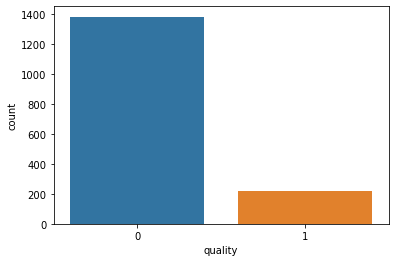

In [12]:
sns.countplot(df.quality)

based on the countplot we can see the dataset is now imbalanced.So we will use oversampling to balance the  data set ,so that there wont be any data loss

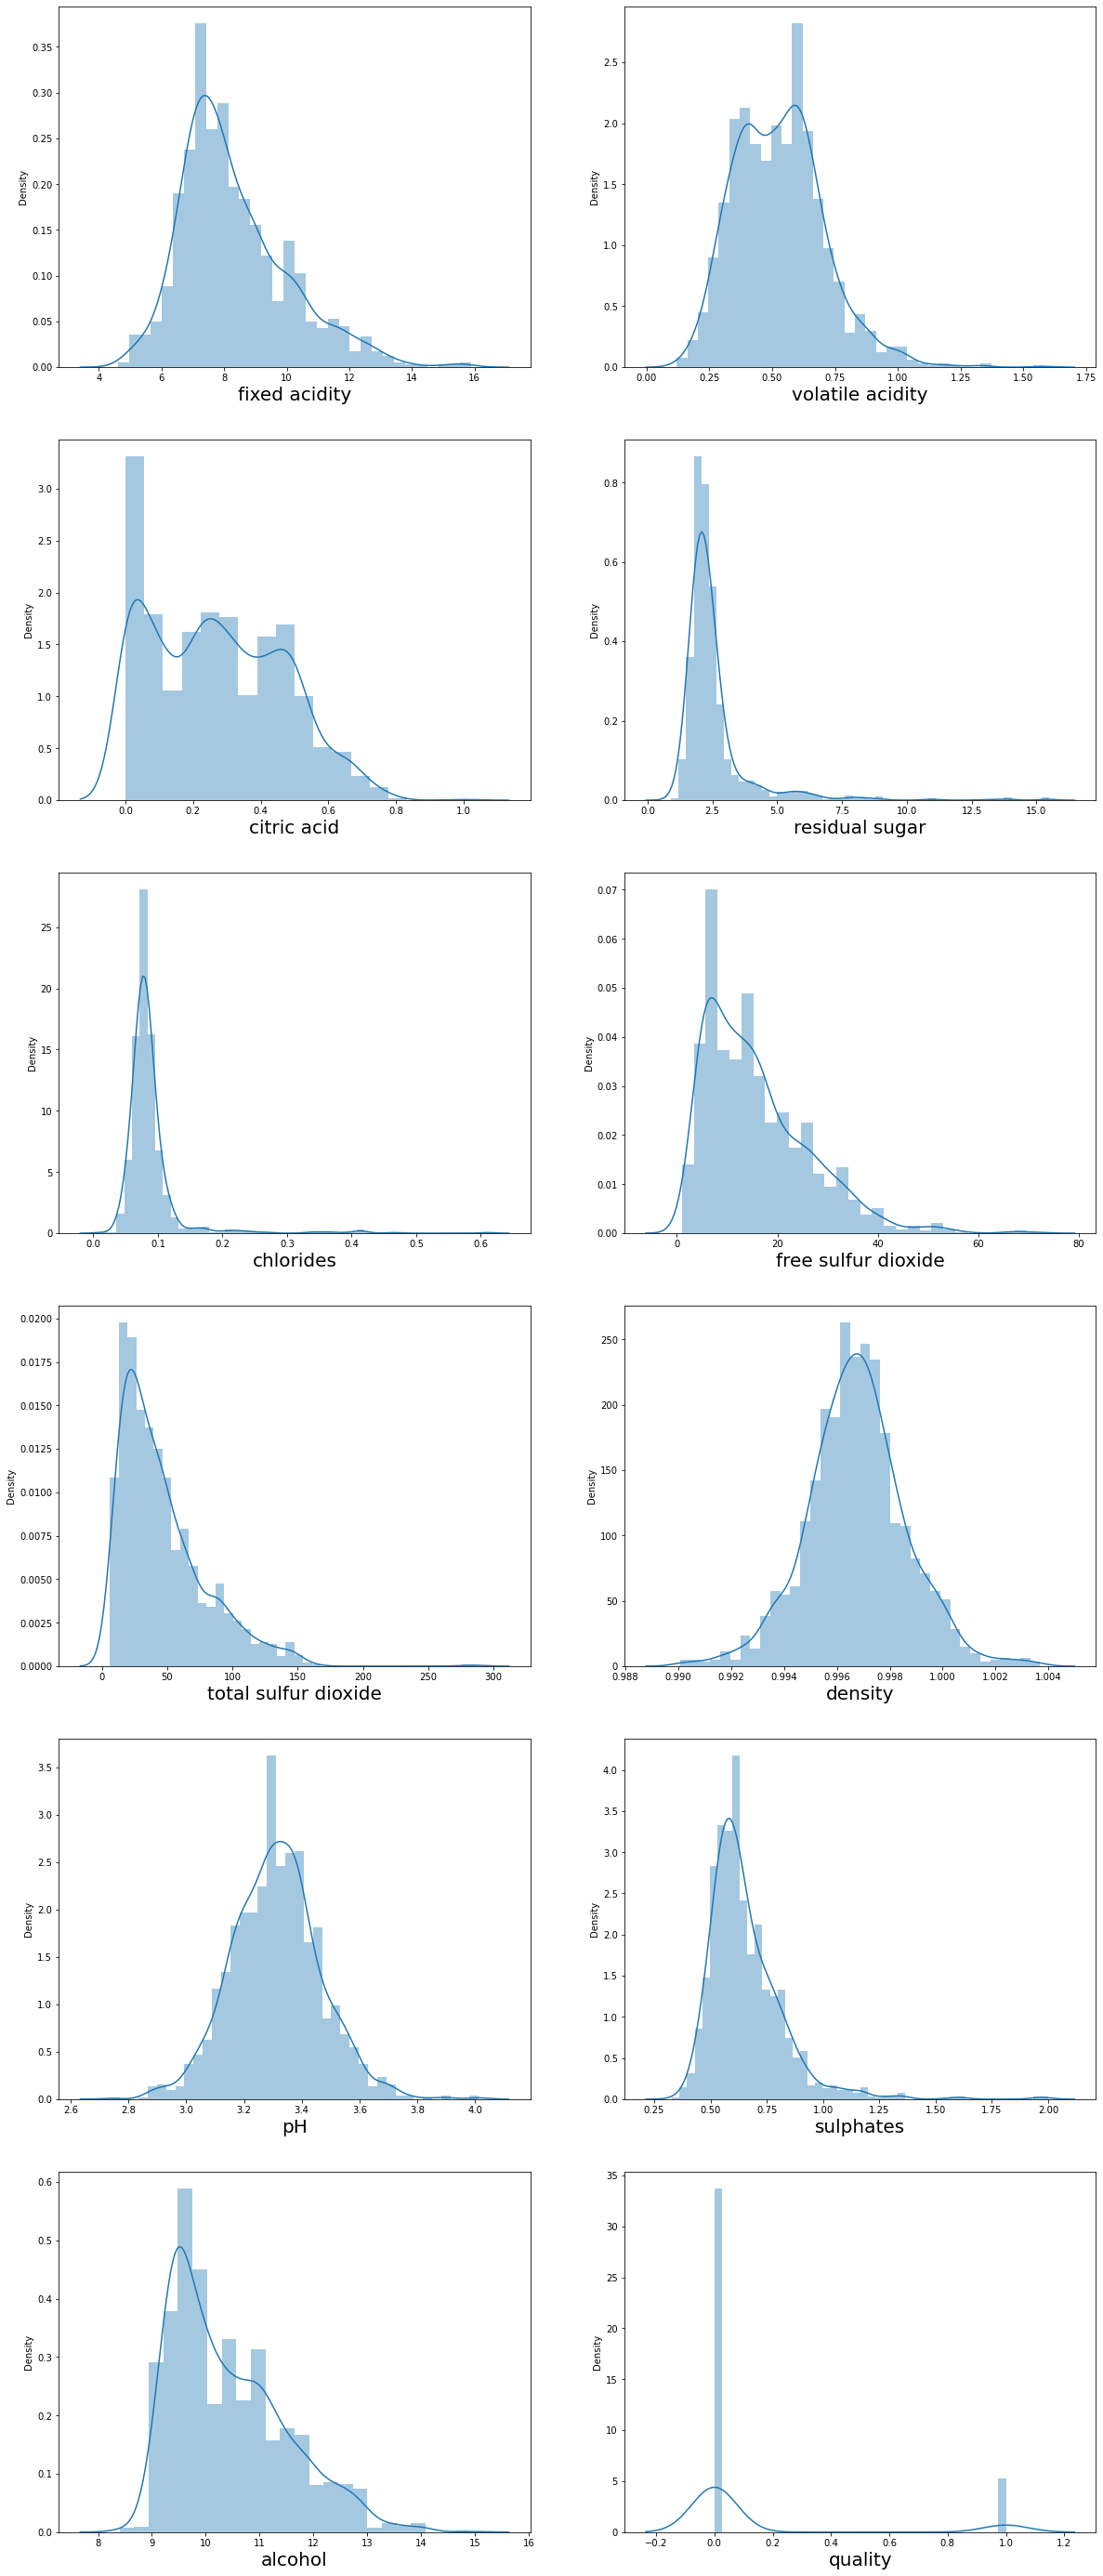

In [13]:
plt.figure(figsize=(20,50))
plot_no=1


for column in df.columns:
    if plot_no<13:
        plt.subplot(6,2,plot_no)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show()

Observations

fixed axidity is skewed

citric acid is right skewed

residual sugar has normal distribution with lot of outliers

cloride is normaly distributed but has lot of outliers

sulphur dioxide is right skewed

total sulphur dioxide is right skewed

density is normally distributed with lot of outliers

ph is normmaly distributed

sulphate is right skewed

alcohol is right skewed

quality is imbalanced

In [6]:
X=df.drop('quality',axis=1)
y=df.quality

In [7]:
X.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [8]:
X.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

we are able to observe skewness for chlorides,residual sugar  ,sulphates,total sulfur dioxide,
free sulfur dioxide ,fixed acidity ,alcohol,volatile acidity

In [9]:
from sklearn.preprocessing import power_transform

In [10]:
X_new=power_transform(X)
X_new

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

In [11]:
X=pd.DataFrame(X_new,columns=X.columns)

In [12]:
X.skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

the skewness of the data is removed using power transformation technique

# Outlier Detection

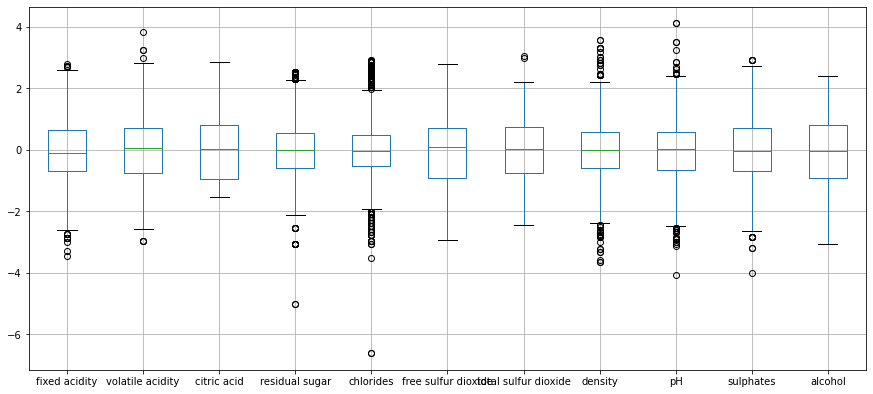

In [21]:
X.iloc[:,0:11].boxplot(figsize=[15,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

we are able to confirm the outliers from the box plot 

#  Zscore to remove skewness

In [13]:
from scipy.stats import zscore

# Using Zscore 
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

fixed acidity           False
volatile acidity        False
citric acid              True
residual sugar          False
chlorides               False
free sulfur dioxide      True
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool

In [14]:
df[np.abs(zscore(X))>3].sum()

fixed acidity             9.30000
volatile acidity          4.24000
citric acid               0.00000
residual sugar           11.40000
chlorides                 0.13400
free sulfur dioxide       0.00000
total sulfur dioxide    289.00000
density                  16.95258
pH                       28.14000
sulphates                 1.07000
alcohol                  16.80000
quality                   0.00000
dtype: float64

the number of outliers presented inside the dataset is quantified.So next is to remove this
outliers

In [24]:
 X[(np.abs(zscore(X))<3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
5,-0.442666,0.802929,-1.531109,-0.837193,-0.226113,-0.021924,0.107498,0.564442,1.275690,-0.581650,-1.075025
6,-0.094677,0.497996,-1.122699,-1.404288,-0.566402,0.193450,0.669200,-0.175390,-0.047962,-1.739501,-1.075025
7,-0.516971,0.753478,-1.531109,NaN,-0.814706,0.193450,-0.799912,-1.140757,0.529832,-1.605418,-0.249498
8,-0.161308,0.391782,-1.391443,-0.380998,-0.335468,-0.555712,-1.011651,0.036967,0.339033,-0.485467,-0.921731
9,-0.370000,-0.058175,0.539338,2.116898,-0.448846,0.385115,1.475168,0.564442,0.275038,1.076325,0.292864


Now the data set has no outliers,lets check the relation ship of the variables with target

In [15]:
corr_mat=df.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


# Heatmp

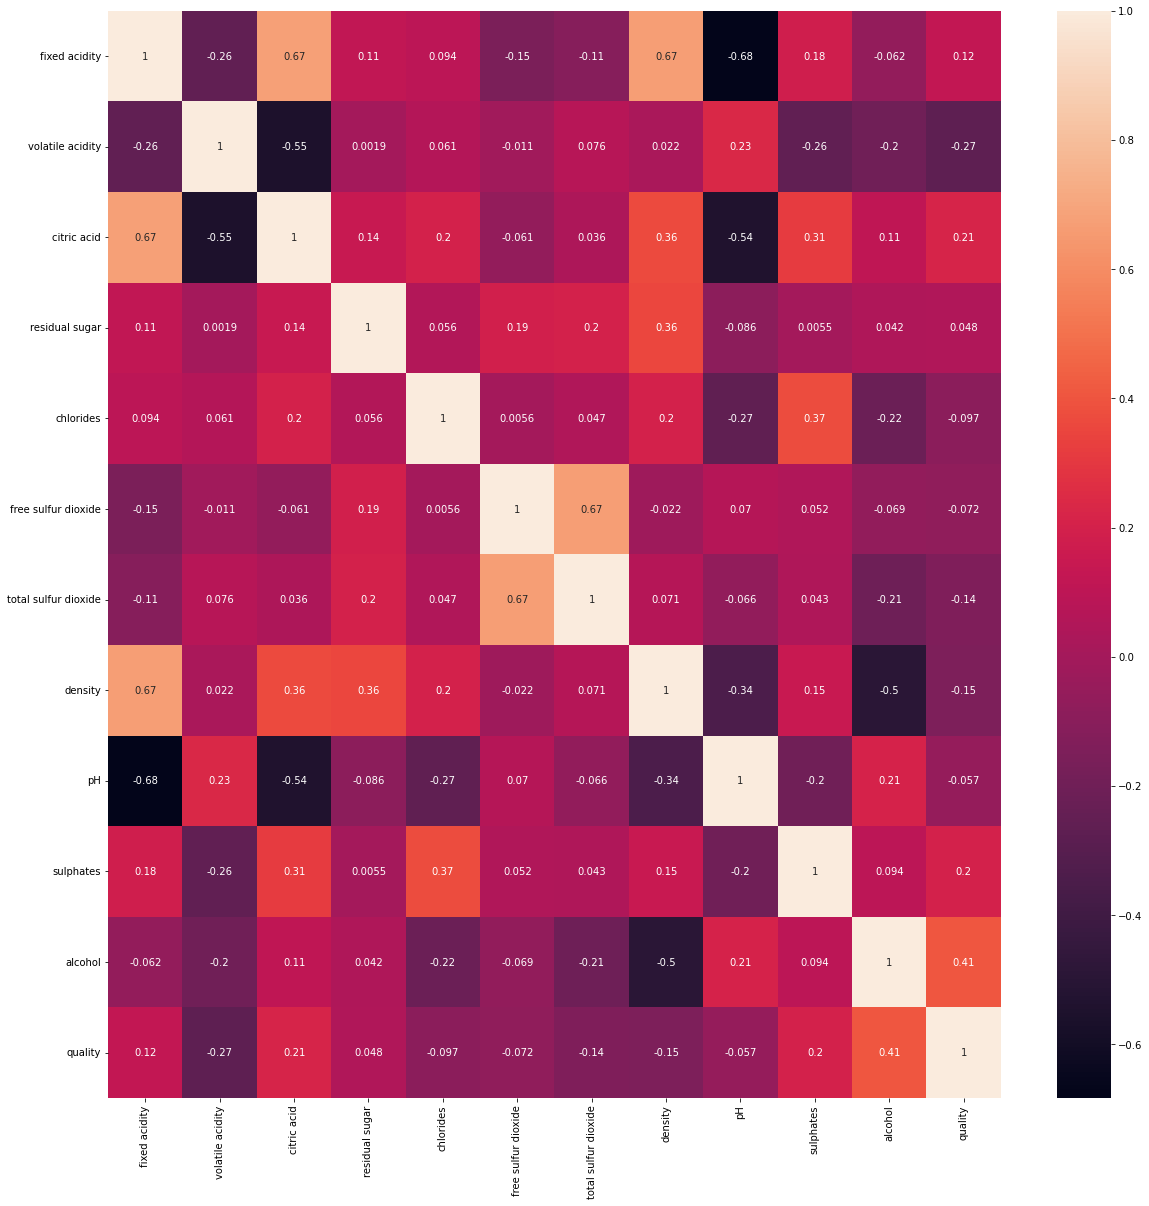

In [16]:
corr_mat=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True)
plt.show()

since we can see the high relation between free sulphur dioxide and total sulphur dioxide,so lets plot the graph

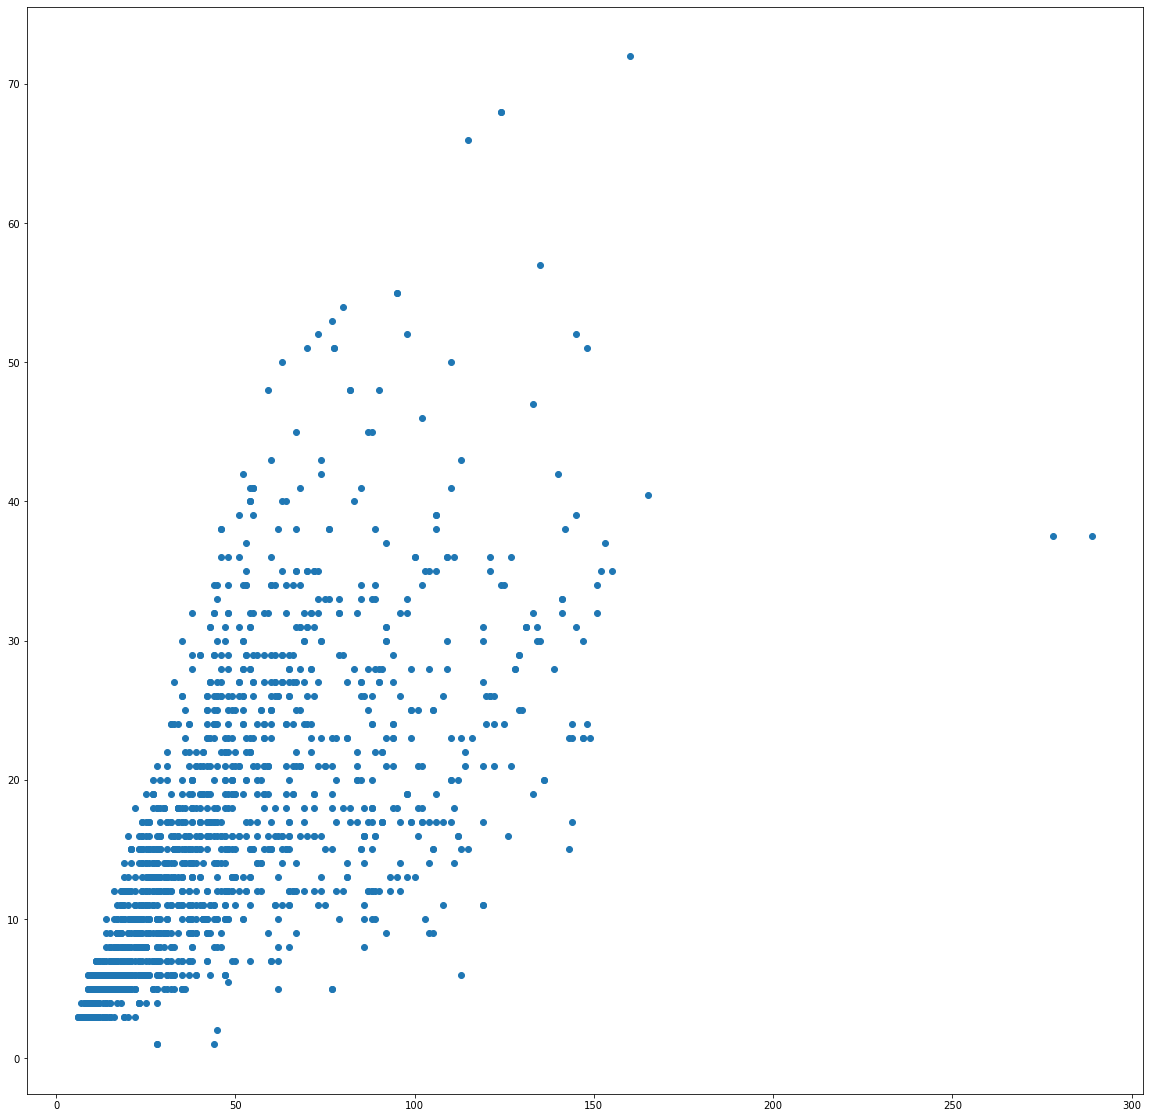

In [27]:
plt.figure(figsize=(20,20))
plt.scatter(df['total sulfur dioxide'],df['free sulfur dioxide'])
plt.show()

# Visualizing correlation using bar plot:

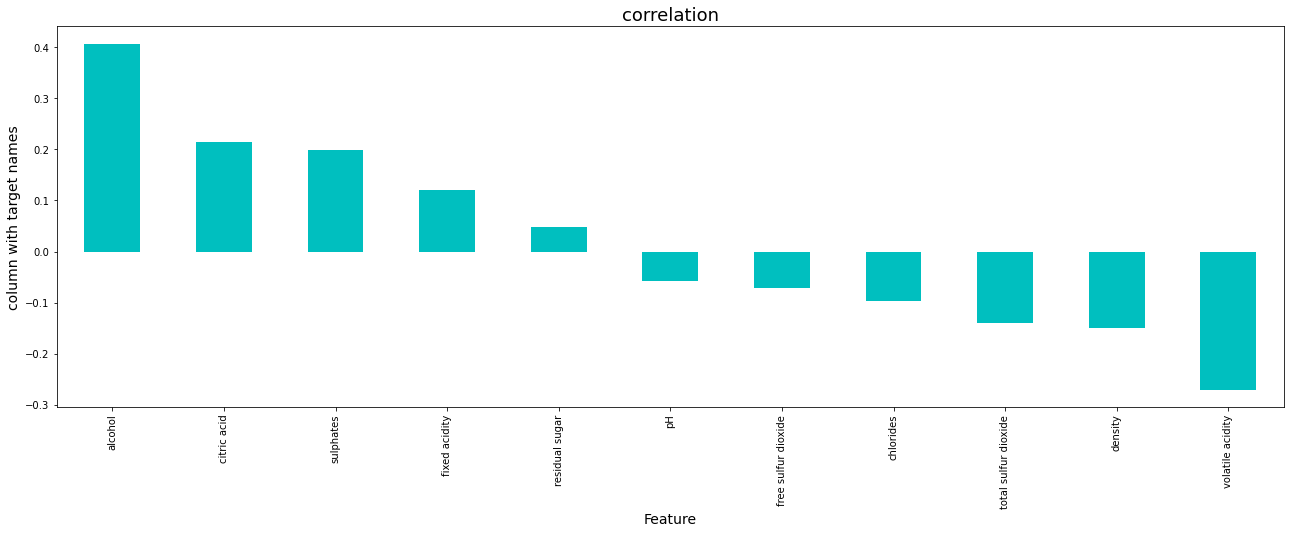

In [17]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [24]:
df.corr()['quality'].sort_values(ascending=False).drop(['quality'])

alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["features"]=X.columns

In [21]:
vif

,vif,features
0,6.498474,fixed acidity
1,1.892941,volatile acidity
2,2.910788,citric acid
3,1.783555,residual sugar
4,1.382009,chlorides
5,2.858944,free sulfur dioxide
6,3.203404,total sulfur dioxide
7,5.968698,density
8,3.099578,pH
9,1.353120,sulphates


In [22]:
X=X.drop(columns='fixed acidity',axis=1)

In [23]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,vif,features
0,1.892206,volatile acidity
1,2.719190,citric acid
2,1.599531,residual sugar
3,1.368383,chlorides
4,2.834108,free sulfur dioxide
5,3.083776,total sulfur dioxide
6,2.653328,density
7,1.615248,pH
8,1.311563,sulphates
9,2.186034,alcohol


 since we can see residual sugar has very less correlation with target

In [29]:
X=X.drop('residual sugar',axis=1)

In [30]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
5,-0.442666,0.802929,-1.531109,-0.226113,-0.021924,0.107498,0.564442,1.275690,-0.581650,-1.075025
6,-0.094677,0.497996,-1.122699,-0.566402,0.193450,0.669200,-0.175390,-0.047962,-1.739501,-1.075025
7,-0.516971,0.753478,-1.531109,-0.814706,0.193450,-0.799912,-1.140757,0.529832,-1.605418,-0.249498
8,-0.161308,0.391782,-1.391443,-0.335468,-0.555712,-1.011651,0.036967,0.339033,-0.485467,-0.921731
9,-0.370000,-0.058175,0.539338,-0.448846,0.385115,1.475168,0.564442,0.275038,1.076325,0.292864


# Preprocessing

In [31]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

 We can observe that the highest count is 1382 so lets do over sampling and get balance the data

In [32]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [33]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


# Balancing data using over-sampling:

In [34]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X_scaled

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

In [35]:
X,y=SM.fit_resample(X_scaled, y)

In [36]:
y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [37]:
X.shape

(2764, 10)

In [38]:
y.shape

(2764,)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

# Choosing best random state

In [41]:
maxAccu=0
maxaRS=0       #max random state

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)     #accuracyscore
    print("testing score ",acc,'random_state',i)
    
    if(maxAccu<acc):
        maxAccu=acc
        maxaRS=i
        print('max_accurracy',maxAccu,'at randomstate',i,"\n\n")

testing score  0.810126582278481 random_state 0
max_accurracy 0.810126582278481 at randomstate 0 


testing score  0.8173598553345389 random_state 1
max_accurracy 0.8173598553345389 at randomstate 1 


testing score  0.8119349005424955 random_state 2
testing score  0.8083182640144665 random_state 3
testing score  0.8173598553345389 random_state 4
testing score  0.8227848101265823 random_state 5
max_accurracy 0.8227848101265823 at randomstate 5 


testing score  0.8300180831826401 random_state 6
max_accurracy 0.8300180831826401 at randomstate 6 


testing score  0.8462929475587704 random_state 7
max_accurracy 0.8462929475587704 at randomstate 7 


testing score  0.8137432188065099 random_state 8
testing score  0.8390596745027125 random_state 9
testing score  0.8155515370705244 random_state 10
testing score  0.8173598553345389 random_state 11
testing score  0.8173598553345389 random_state 12
testing score  0.8137432188065099 random_state 13
testing score  0.7956600361663653 random_state 

testing score  0.8209764918625678 random_state 156
testing score  0.8300180831826401 random_state 157
testing score  0.8300180831826401 random_state 158
testing score  0.8318264014466547 random_state 159
testing score  0.8119349005424955 random_state 160
testing score  0.8083182640144665 random_state 161
testing score  0.786618444846293 random_state 162
testing score  0.8137432188065099 random_state 163
testing score  0.7992766726943942 random_state 164
testing score  0.8119349005424955 random_state 165
testing score  0.8264014466546112 random_state 166
testing score  0.8065099457504521 random_state 167
testing score  0.8390596745027125 random_state 168
testing score  0.810126582278481 random_state 169
testing score  0.8173598553345389 random_state 170
testing score  0.7884267631103075 random_state 171
testing score  0.8245931283905967 random_state 172
testing score  0.8300180831826401 random_state 173
testing score  0.8227848101265823 random_state 174
testing score  0.7956600361663653

we will choose random state as 110 based on the iterations

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=110)

In [63]:
y.shape

(2764,)

# i) Logistic Regression

In [64]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("testing score ",accuracy_score(y_test,pred_lr)*100)
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))


testing score  85.17179023508137
[[224  42]
 [ 40 247]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       266
           1       0.85      0.86      0.86       287

    accuracy                           0.85       553
   macro avg       0.85      0.85      0.85       553
weighted avg       0.85      0.85      0.85       553



# ii) DecisionTreeClassifier:

In [65]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("testing score ",accuracy_score(y_test,pred_dt)*100)
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))


testing score  91.13924050632912
[[244  22]
 [ 27 260]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       266
           1       0.92      0.91      0.91       287

    accuracy                           0.91       553
   macro avg       0.91      0.91      0.91       553
weighted avg       0.91      0.91      0.91       553



# iii) RandomForestClassifier:

In [66]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print("testing score ",accuracy_score(y_test,pred_rfc)*100)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))


testing score  95.29837251356238
[[251  15]
 [ 11 276]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.95      0.96      0.96       287

    accuracy                           0.95       553
   macro avg       0.95      0.95      0.95       553
weighted avg       0.95      0.95      0.95       553



# iv) Support Vector Classifier:

In [67]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("testing score ",accuracy_score(y_test,pred_svc)*100)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))


testing score  88.96925858951175
[[227  39]
 [ 22 265]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       266
           1       0.87      0.92      0.90       287

    accuracy                           0.89       553
   macro avg       0.89      0.89      0.89       553
weighted avg       0.89      0.89      0.89       553



# v) K-Nearest Neighbours:

In [68]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("testing score ",accuracy_score(y_test,pred_knn)*100)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))


testing score  90.41591320072332
[[220  46]
 [  7 280]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       266
           1       0.86      0.98      0.91       287

    accuracy                           0.90       553
   macro avg       0.91      0.90      0.90       553
weighted avg       0.91      0.90      0.90       553



# Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cr_lr=cross_val_score(LR,X,y,cv=5).mean()
print("cross validation score of lr model is :",cr_lr)


cross validation score of lr model is : 0.8010188169929501


In [71]:
cr_dt=cross_val_score(dt,X,y,cv=5).mean()
print("cross validation score of (Decision tree) dt model is :",cr_dt)


cross validation score of (Decision tree) dt model is : 0.8679455932070133


In [72]:
cr_rfc=cross_val_score(rfc,X,y,cv=5).mean()
print("cross validation score of (Random forest)rfc model is :",cr_rfc)


cross validation score of (Random forest)rfc model is : 0.9157002646958619


In [73]:
cr_knn=cross_val_score(knn,X,y,cv=5).mean()
print("cross validation score of knn model is :",cr_knn)
   

cross validation score of knn model is : 0.8581708467646827


In [74]:
cr_svc=cross_val_score(svc,X,y,cv=5).mean()
print("cross validation score of svc model is :",cr_svc)


cross validation score of svc model is : 0.8527478575359698


The difference between the accuracy of the model and the cross validation score is less for svc. 

# Hyper parametric tunning

In [55]:
from sklearn.model_selection import GridSearchCV

In [110]:
parameters= {'C':[1,5,10,15,20],
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma' :[.01,.001,.02,.002],
            'random_state':[45]}

In [111]:
#GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')

In [112]:
GCV=GridSearchCV(svc,parameters)

In [113]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 20, 'gamma': 0.02, 'kernel': 'rbf', 'random_state': 45}

In [117]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred) 

0.8842676311030742

So i'm getting 88.42% as best accuracy with SVC after tuning which is good.

# ROC AUC curve:

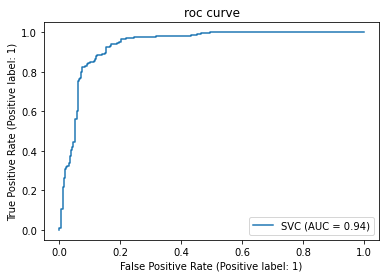

In [118]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("roc curve")
plt.show()

This shows the roc curve which is produced by calculating the true positive rate against false positive rate for Randomforest and auc value is AUC=.94 which is good.

# Saving the model:

In [119]:
import joblib
joblib.dump(svc,"Red_Wine.pkl")

['Red_Wine.pkl']